In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# **Assignment5**


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

####Physicist **Amos Dolbear** noticed that crickets chirped differently at different temperatures. He noticed that they chirped faster when it was hotter. So, he recorded how fast they chirped and the temperature. 

**FIELD CRICKET**
***************************
![alt text](https://gardenplannerwebsites.azureedge.net/blog/bush-katydid-2x.jpg)


In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0, 14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5, 76.3]}
df = pd.DataFrame(ground_cricket_data)

##**OUR PROCEDURE**
* First we want to predict Ground temperature with respect to chirps/second.
* Second we want to find chirps/second with respect to Ground temperature.

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [5]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [6]:
df.shape

(15, 2)

##**OUTLIERS EXIST OR NOT**

In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Chirps/Second,15.0,16.566667,1.712837,14.4,15.45,16.0,17.15,20.0
Ground Temperature,15.0,79.346667,7.020467,69.4,73.40,80.6,83.40,93.3


###**CHECK THE PRESENCE OF OUTLIERS**

In [8]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [9]:
def outlierpresence(df):
  for feature in df.columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*(IQR)
    upper_fence = Q3 + 1.5*(IQR)
    total_outliers = df.loc[(df[feature] < lower_fence) | (df[feature] > upper_fence)]
    if len(total_outliers):
      print("{} Outliers present in {}".format(len(total_outliers), feature))
outlierpresence(df)

2 Outliers present in Chirps/Second


In [10]:
def clip_outliers(df):
  for feature in df.columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*(IQR)
    upper_fence = Q3 + 1.5*(IQR)
    df[feature] = df[feature].clip(lower_fence, upper_fence)
clip_outliers(df)

Here we have 2 outliers only. Hence replaced them with their respective fence values

##**Datatypes**

In [11]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

##**EDA**

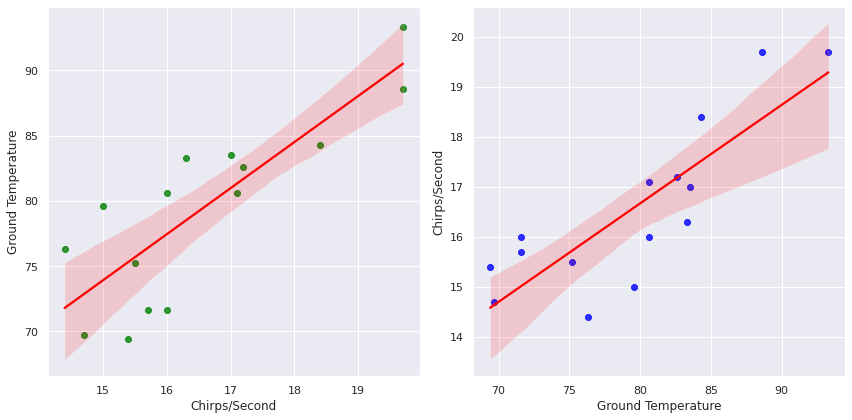

In [12]:
import seaborn as sns
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(x="Chirps/Second", y='Ground Temperature', data=df, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(122)
sns.regplot(x="Ground Temperature", y='Chirps/Second', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.tight_layout()
plt.show()

From above graph, we see a linear relationship between both the features

##**CHECK FOR CORRELATION**

In [13]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.834284
Ground Temperature,0.834284,1.000000


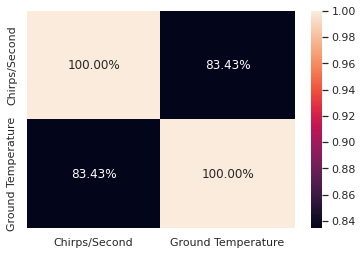

In [14]:
sns.heatmap(df.corr(), annot=True, fmt="0.2%")

The correlation b/w feature is 83.43%

##**Fitting of the linear model**

##**Prediction model for Ground Temperature**

In [15]:
X = df["Chirps/Second"].to_frame()
Y = df["Ground Temperature"]

In [16]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X) 
X = scaler.transform(X)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)
y_pred = model.predict(X)
y_pred

array([90.51398308, 77.43832779, 90.51398308, 85.91983392, 81.32568477,
       75.67134734, 72.84417863, 76.37813952, 75.31795125, 78.49851605,
       73.9043669 , 81.67908085, 77.43832779, 80.97228868, 71.78399036])

In [18]:
print(model.intercept_, model.coef_, model.predict([[15]]))

79.34666666666665 [5.65845888] [164.22354982]


###**Metric-R2-Score apply to given model**

In [19]:
from sklearn.metrics import r2_score 
print('R2- SCORE:', r2_score(Y, y_pred))

R2- SCORE: 0.6960294034973342


##**Prediction model for Chirps/Second of ground Cricket**

In [20]:
x = df["Ground Temperature"].to_frame()
y = df["Chirps/Second"]


In [21]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x) 
x = scaler.transform(x)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(x, y) 

LinearRegression()

In [23]:
print(regressor.intercept_)
print(regressor.coef_) 
print(regressor.predict([[80]]))

16.539999999999996
[1.335827]
[123.40616026]


Text(0.5, 0, 'Ground Temperature')

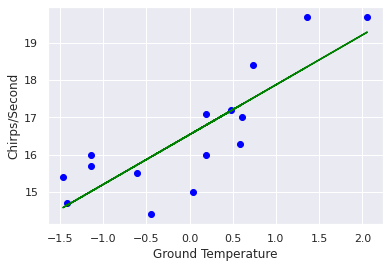

In [24]:
plt.scatter(x, y, color='blue')
plt.plot(x, regressor.predict(x), color='green')
plt.ylabel('Chirps/Second')
plt.xlabel('Ground Temperature')


In [25]:
y_pred = regressor.predict(x) 
pd.DataFrame(y_pred)

,0
0,18.362485
1,15.014259
2,19.288171
3,17.515581
4,16.786850
5,15.723295
6,14.640046
7,15.014259
8,14.580960
9,17.318627


In [26]:
df2 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df2

,Actual,Predicted
0,19.7,18.362485
1,16.0,15.014259
2,19.7,19.288171
3,18.4,17.515581
4,17.1,16.786850
5,15.5,15.723295
6,14.7,14.640046
7,15.7,15.014259
8,15.4,14.580960
9,16.3,17.318627


###**Metric-R2-Score apply to given model**

In [27]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.6960294034973338


# **Assignment6**

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

##**About Data Set**

In [28]:
df = pd.read_fwf("https://raw.githubusercontent.com/Jaiprakash91194/Assessments/main/Task6/brain_body.txt")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [30]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [31]:
df.shape

(62, 2)

##**OUTLIERS EXIST OR NOT**

In [32]:
x = df.describe().T
x

,count,mean,std,min,25%,50%,75%,max
Brain,62.0,198.789984,899.158011,0.005,0.60,3.3425,48.2025,6654.0
Body,62.0,283.134194,930.278942,0.140,4.25,17.2500,166.0000,5712.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


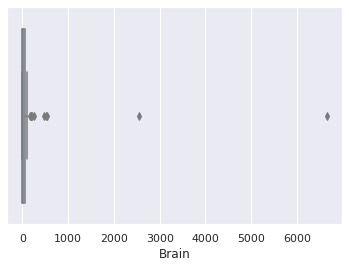

In [33]:
import seaborn as sns
sns.boxplot(df["Brain"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


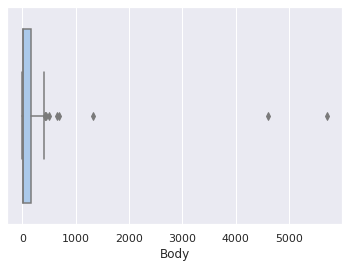

In [34]:
sns.boxplot(df["Body"])

###**CHECK THE PRESENCE OF OUTLIERS**

#### in this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.

#### the code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’ variable.

In [35]:
outlierpresence(df)

10 Outliers present in Brain
9 Outliers present in Body


In [36]:
clip_outliers(df)

Outliers present in the datas of 'Brain' and 'Body' columns. Replaced them with Upper and lower fence values

###**EDA - Box plots in each case**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


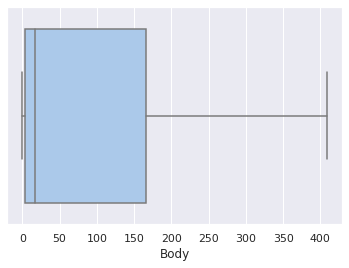

In [37]:
import seaborn as sns
sns.boxplot(df["Body"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


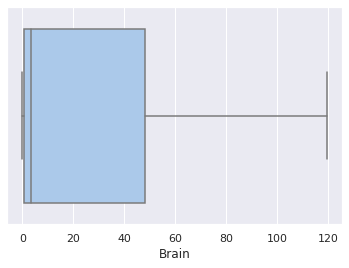

In [38]:
sns.boxplot(df["Brain"])

In [39]:
df.shape

(62, 2)

###**EDA AFTER OUTLIER TRATMENT**

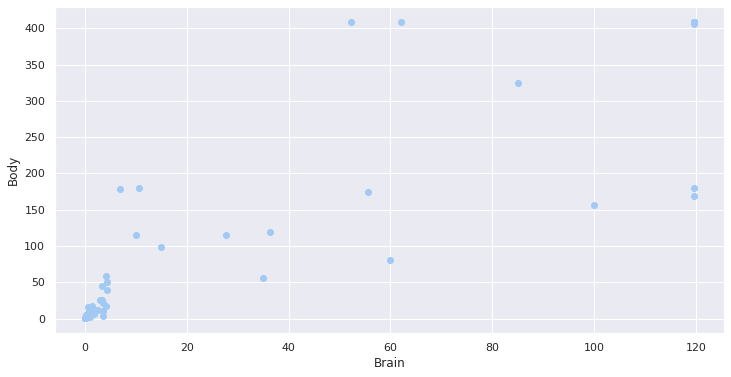

In [40]:
# Scatter plot
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(df["Brain"], df["Body"])
# x-axis label
ax.set_xlabel('Brain')
# y-axis label
ax.set_ylabel('Body')
plt.show()

# **Assignment7**

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

##**About Data Set**

In [41]:
df = pd.read_fwf("https://raw.githubusercontent.com/Jaiprakash91194/Assessments/main/Task6/salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [42]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [44]:
# Datas are clean.

In [45]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [46]:
df.shape

(52, 6)

##**OUTLIERS EXIST OR NOT**

In [47]:
x = df.describe().T
x

,count,mean,std,min,25%,50%,75%,max
Sex,52.0,0.269231,0.447888,0.0,0.00,0.0,1.00,1.0
Rank,52.0,2.038462,0.862316,1.0,1.00,2.0,3.00,3.0
Year,52.0,7.480769,5.507536,0.0,3.00,7.0,11.00,25.0
Degree,52.0,0.653846,0.480384,0.0,0.00,1.0,1.00,1.0
YSdeg,52.0,16.115385,10.222340,1.0,6.75,15.5,23.25,35.0
Salary,52.0,23797.653846,5917.289154,15000.0,18246.75,23719.0,27258.50,38045.0


###**CHECK THE PRESENCE OF OUTLIERS**

In [48]:
outlierpresence(df)

1 Outliers present in Year


In [49]:
clip_outliers(df)

###**CHECK FOR DUPLICATES**

In [50]:
df.shape, sum(df.duplicated())

((52, 6), 0)

In [51]:
df = df.drop_duplicates()

In [52]:
df.shape

(52, 6)

###**EDA AFTER OUTLIER TRATMENT**

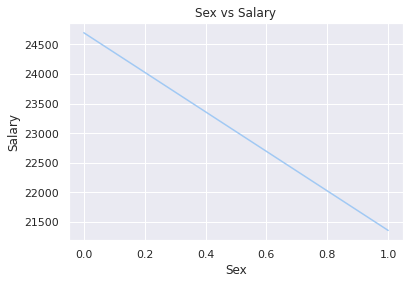

In [53]:
df.groupby('Sex')['Salary'].mean().plot()
#df.plot(x='', y='Petrol_Consumption', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

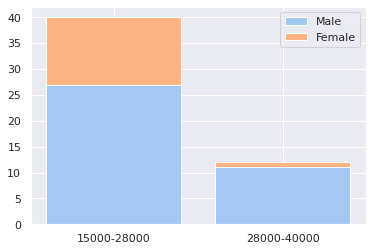

In [54]:
plt.figure()
labels = ['15000-28000', '28000-40000']
x = np.arange(len(labels))
Malegroup = df[df["Sex"]==0]["Salary"]
Femalegroup = df[df["Sex"]==1]["Salary"]
df['group1'] = pd.cut(Malegroup, bins = [15000,28000,40000], include_lowest = True)
df['group2'] = pd.cut(Femalegroup, bins = [15000,28000,40000], include_lowest = True)
group1 = df.groupby(by = 'group1').size()
group2 = df.groupby(by = "group2").size()
bars1 = [group1[0],group1[1]]
bars2 = [group2[0],group2[1]]
plt.bar(x, bars1, label = 'Male')
plt.bar(x, bars2, bottom=bars1, label = 'Female')
plt.legend()
plt.xticks(x, labels)
plt.show()

In [55]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


####**Sex has no influence over salary. There is no proper linear relation between `Sex` and `Salary`**

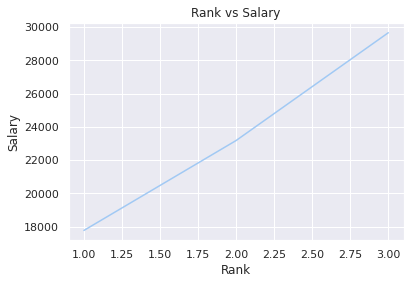

In [56]:
df.groupby('Rank')['Salary'].mean().plot()
#df.plot(x='', y='Petrol_Consumption', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [57]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


####**Rank has more influence over salary. There is a good linear relation between `Rank` and `Salary`**

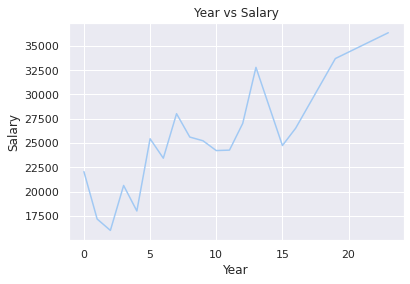

In [58]:
df.groupby('Year')['Salary'].mean().plot()
#df.plot(x='', y='Petrol_Consumption', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [59]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700711
Salary,0.700711,1.000000


####**Year has slight influence over salary. There is a better linear relation between `Year` and `Salary`**

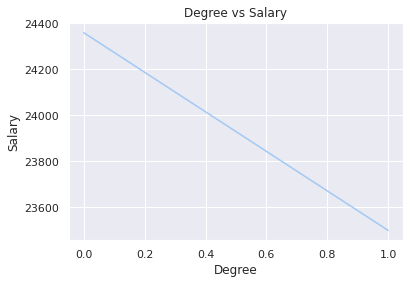

In [60]:
df.groupby('Degree')['Salary'].mean().plot()
#df.plot(x='', y='Petrol_Consumption', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [61]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


####**Degree has no much influence over salary. There is no much better linear relation between `Degree` and `Salary`**

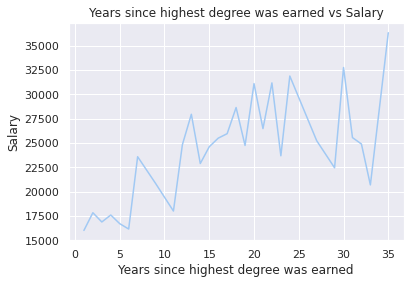

In [62]:
# YSdeg
df.groupby('YSdeg')['Salary'].mean().plot()
#df.plot(x='', y='Petrol_Consumption', style='o')
plt.title('Years since highest degree was earned vs Salary')
plt.xlabel('Years since highest degree was earned')
plt.ylabel('Salary')
plt.show()

In [63]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


####**`YSdeg` has less influence than `Years` over salary. There is a slightly good linear relation between `YSdeg` and `Salary`**

###**CONCLUSIONS FROM EDA**
* Here we have two dominant linear relationships `Rank` and `Year`.
* Very less influenced factors are `Degree` and `YSdeg`
* `Sex` gives very less linear relationship. So, clearly there is no salary discremenation by `Sex`.   

##**SPLITTING OF DATA**

In [64]:
X = df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values #array of features
y = df['Salary'].values

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

##**MODEL TRAINING**

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,463.698987
Rank,4604.131654
Year,2391.008498
Degree,195.876325
YSdeg,-400.371906


###**CONCLUSIONS FROM REGRESSION MODEL**
* Again, we have same two dominant factors `Rank` and `Year`.
* But, here very less influenced factors are `Sex` and `YSdeg`.
* `Degree` has less dependency over the `Salary` throgh this model.

In [69]:
regressor.coef_

array([ 463.69898704, 4604.13165448, 2391.00849814,  195.87632514,
       -400.37190628])

In [70]:
regressor.intercept_ # c 

23655.90243902439

In [71]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,26182,21263.906323
1,17095,16931.906110
2,24750,26578.916243
3,22450,22779.878765
4,28200,29509.262157
5,21600,19785.909240
6,18075,16485.820321
7,23713,18358.937802
8,24800,24985.804178
9,33696,32835.375656


In [72]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6477828206735224


###**OVERALL CONCLUSION**
* `Sex` is not much a dependent factor in `Salary`.
* Similarly we can conclude `Degree` and `YSdeg` has no influence to control over `Salary`.
* **Most important dependent factores are : `Rank` and `Year`**.
* **That is, `Salry` of assistant professors who has more work year experience are much more than less year worked associate or full professors.**
* **There is no salary discrimination by `Sex`**.